In [1]:
# numpy and pandas
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, cut_tree
from scipy.cluster.hierarchy import dendrogram
# K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

### Principal Component Analysis

In [2]:
# my_path = '/Users/francis/Desktop/DSBA/Statistics and Probability/assignment-2/'
your_path = ''
df = pd.read_csv(your_path + 'wines_properties.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
# Get the data matrix. The last column (the classification) is excluded.
X = df.iloc[:, 0:-1]
# Standardize the data
X_s = StandardScaler().fit_transform(X)
#PCA instance
pca = PCA(n_components=2)
# Project the data
X_p = pca.fit_transform(X_s)

In [5]:
PCs = pca.components_
PCs.shape

(2, 13)

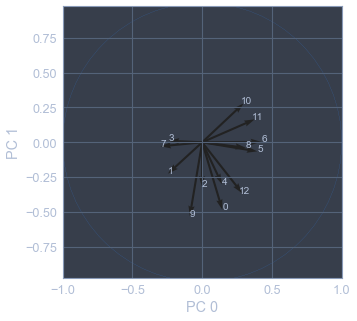

In [6]:
# "Circle of correlations"
# Get the PCA components (loadings)
PCs = pca.components_
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)
# Add labels based on feature names (here just numbers)
feature_names = np.arange(PCs.shape[1])
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)
# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])
# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')
# Done
plt.show()

In [7]:
for i, feature in enumerate(df.columns.values[:-1]):
    print(i, feature)

0 Alcohol
1 Malic_Acid
2 Ash
3 Ash_Alcanity
4 Magnesium
5 Total_Phenols
6 Flavanoids
7 Nonflavanoid_Phenols
8 Proanthocyanins
9 Color_Intensity
10 Hue
11 OD280
12 Proline


* From the circle of correlations, we can see that the first component gives more positive weights to feature 5 and 6, namely Total_Phenols and Flavanoids, while it maybe negatively correlated with 7 (Nonflavanoid_Phenols) and 1 (Malic_Acid). 
* By looking at the vertical axis, we see that the second component gives more positive weights to feature 10 and 11, i.e. Hue and OD280. It gives the largest negative weights to 9 (Color_Intensity) and 0 (Alcohol), so it may have a strong negative correlation with them.

The above statements can be verified by calculating the correlation between the two components and the original variables respectively.

### Hierarchical Clustering

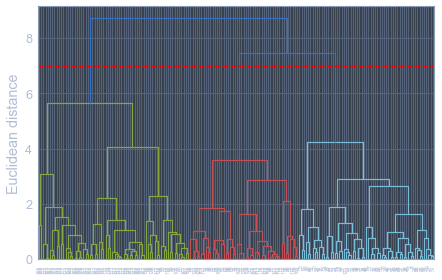

In [8]:
# cluster the projected data X_p
row_clusters = linkage(X_p, method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.axhline(y=7, color='red', linestyle="--")
plt.show()

From the dendogram, a likely number of cluster is 3, as can be seen from the number of crossovers made by the red horizontal line.

### K-means Clustering Algorithm

In [9]:
# KMeans instance
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
# partition (or clustering) of the data
partition = kmeans.fit_predict(X_p)

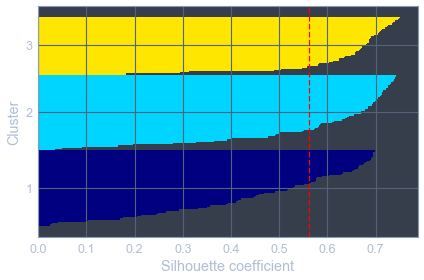

In [10]:
# Calculate the silhouette scores
silhouette_vals = silhouette_samples(X_p, partition, metric='euclidean')
# Plot the silhouette scores
cluster_labels = np.unique(partition)
n_clusters = 3
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[partition == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

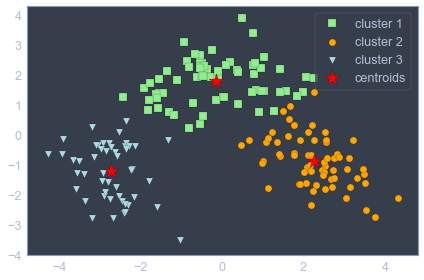

In [11]:
# Plot the output of the k-means clustering algorithm
# cluster 1
plt.scatter(X_p[partition == 0, 0],
            X_p[partition == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
# cluster 2
plt.scatter(X_p[partition == 1, 0],
            X_p[partition == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
# cluster 3
plt.scatter(X_p[partition == 2, 0],
            X_p[partition == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
# centroids 
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### Wrap-up Functions

In [12]:
def clustering(X):
    # Principal Component Analysis
    X_s = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_p = pca.fit_transform(X_s)
    
    # Run a hierarchical clustering and select the optimal cluster size by comparing silhouette scores
    row_clusters = linkage(X_p, method='complete', metric='euclidean')
    optimal_cluster_size = 1; optimal_silhouette = -1
    for k in range(2, len(X)):
        silhouette_avg = np.mean(silhouette_samples(X_p, cut_tree(row_clusters, k).ravel(), metric='euclidean'))
        if silhouette_avg > optimal_silhouette:
            optimal_silhouette = silhouette_avg
            optimal_cluster_size = k
    print('The optimal cluster size is {}.'.format(optimal_cluster_size))

    # partition the data set using the k-means clustering algorithm
    kmeans = KMeans(n_clusters=optimal_cluster_size, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    # partition (or clustering) of the data
    partition = kmeans.fit_predict(X_p)
    
    # plot the clustering result
    for i in range(optimal_cluster_size):
        plt.scatter(X_p[partition == i, 0], X_p[partition == i, 1], s=50, label='cluster {}'.format(i))
    plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='*', c='red', edgecolor='black', label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    plt.show()
    # return the optimal number of clusters
#     return optimal_cluster_size

The optimal cluster size is 3.


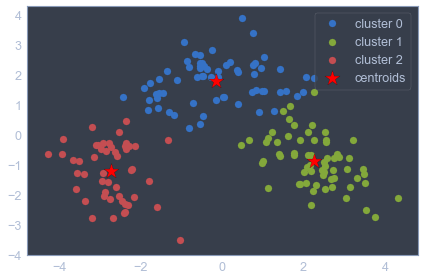

In [13]:
clustering(X)

In [14]:
def pca_circle_of_correlations(X):
    X_s = StandardScaler().fit_transform(X)
    pca = PCA()
    X_p = pca.fit_transform(X_s)
    
    for i in range(pca.n_features_ - 1):
        for j in list(range(pca.n_features_))[i+1:]:        
            PCs = pca.components_[[i, j], :]
            # Use quiver to generate the basic plot
            fig = plt.figure(figsize=(5,5))
            plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
                       PCs[0,:], PCs[1,:], 
                       angles='xy', scale_units='xy', scale=1)
            # Add labels based on feature names (here just numbers)
            feature_names = np.arange(PCs.shape[1])
            for p,q,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
                plt.text(q, p, z, ha='center', va='center')
            # Add unit circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
            # Ensure correct aspect ratio and axis limits
            plt.axis('equal')
            plt.xlim([-1.0,1.0])
            plt.ylim([-1.0,1.0])
            # Label axes
            plt.xlabel('PC {}'.format(i))
            plt.ylabel('PC {}'.format(j))
            # Done
            plt.show()

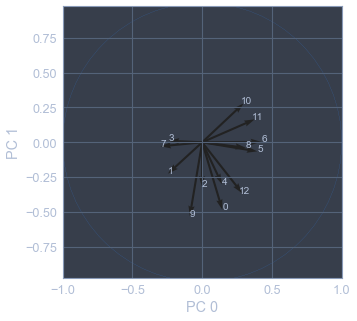

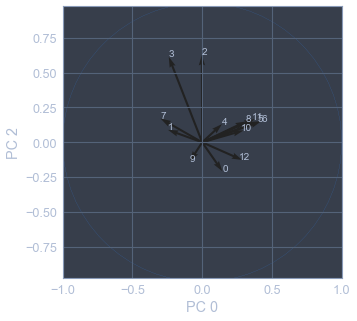

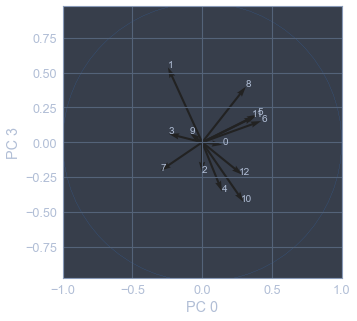

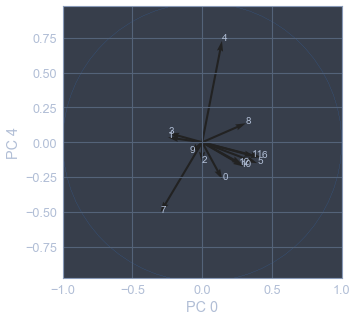

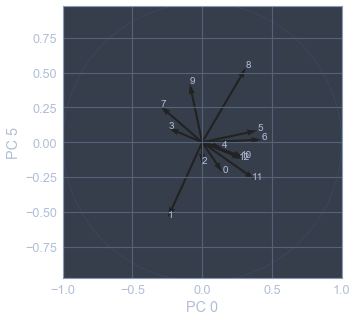

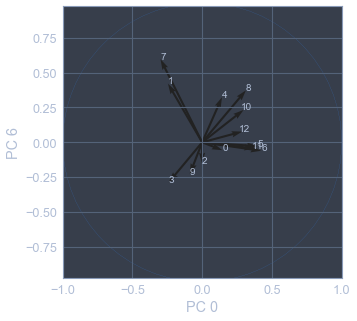

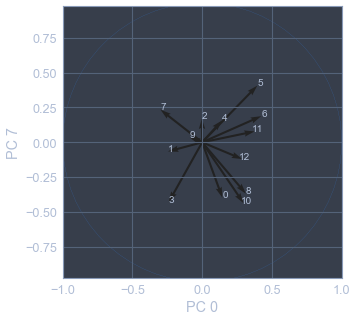

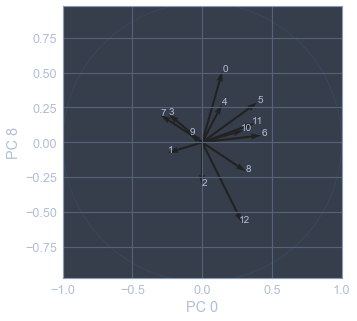

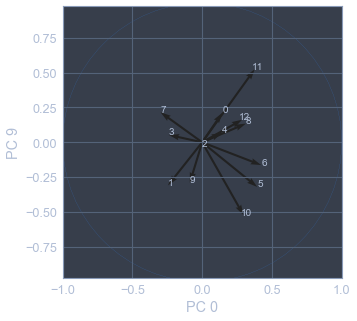

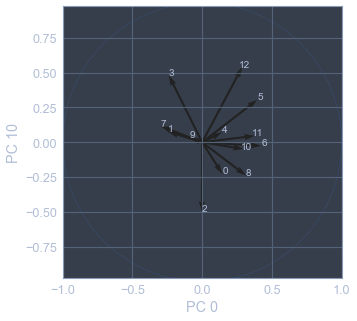

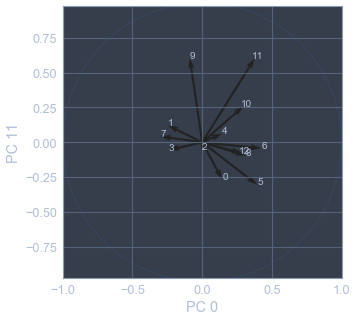

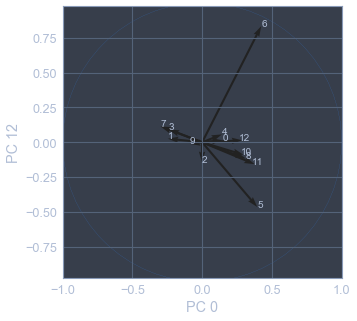

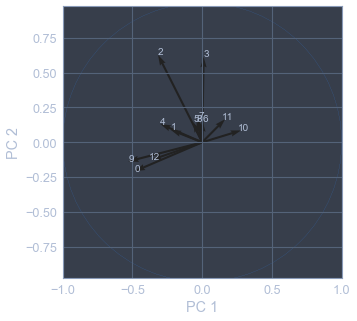

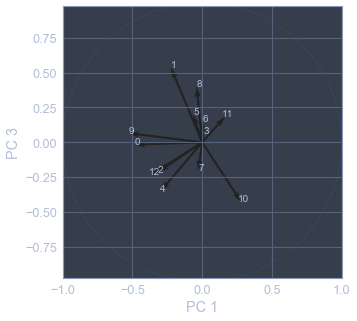

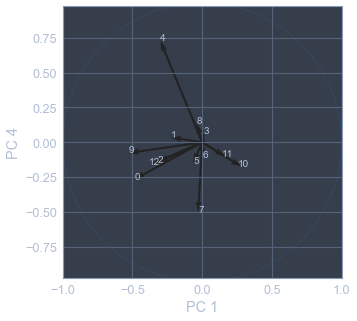

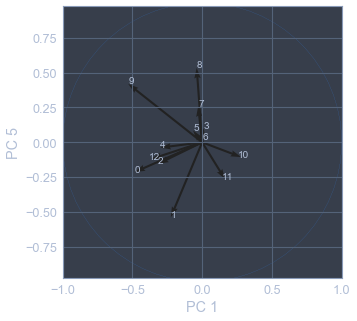

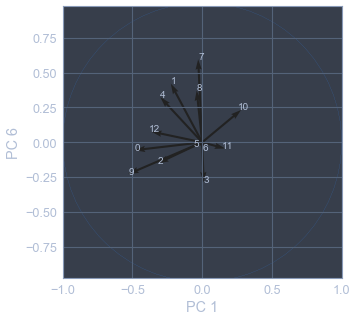

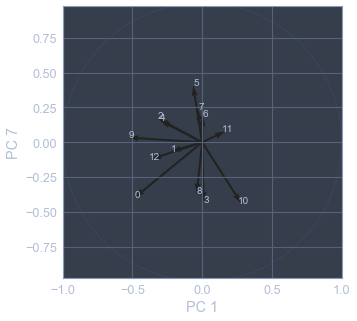

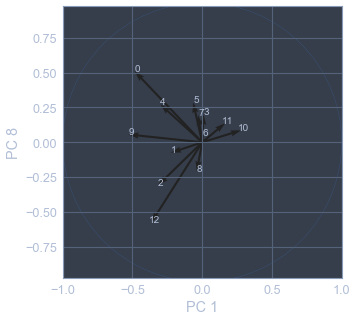

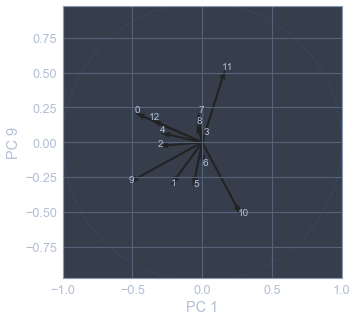

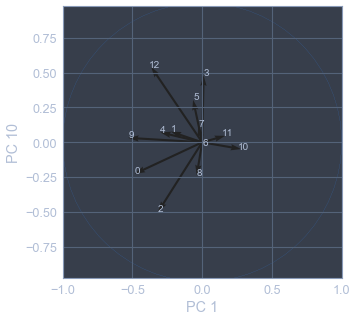

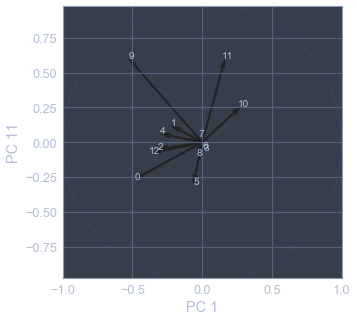

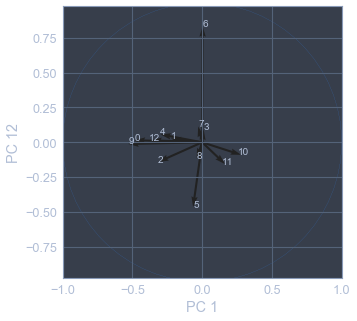

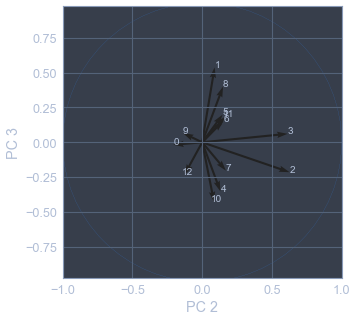

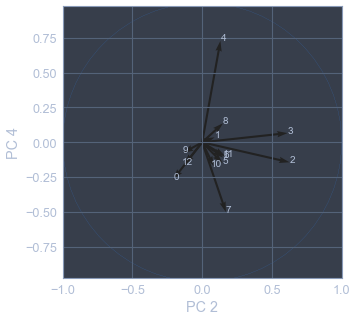

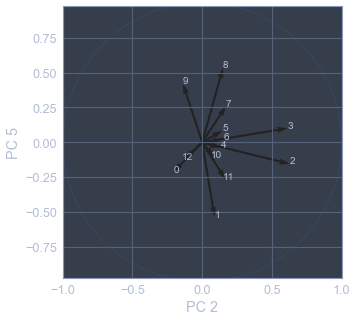

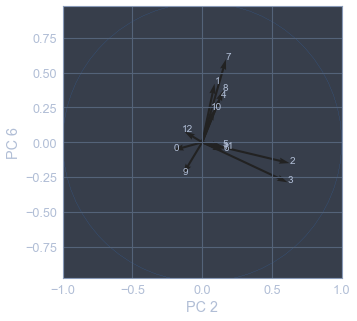

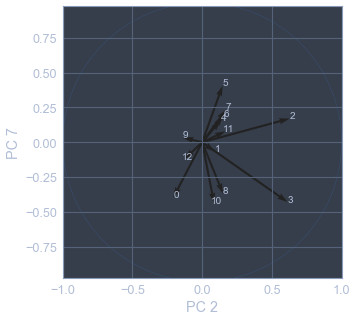

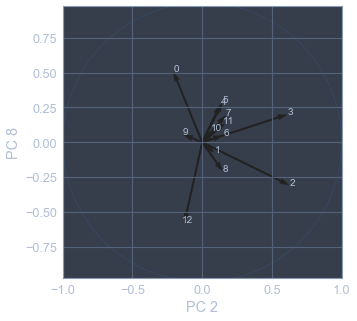

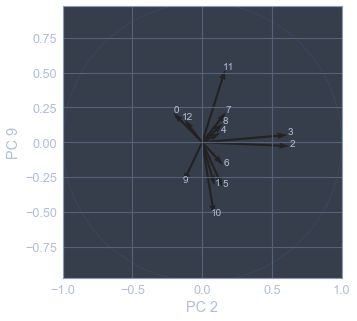

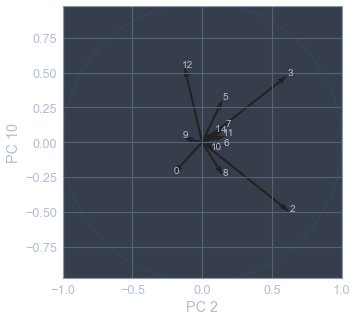

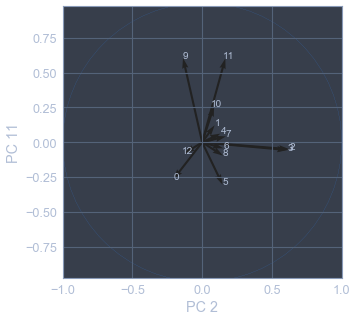

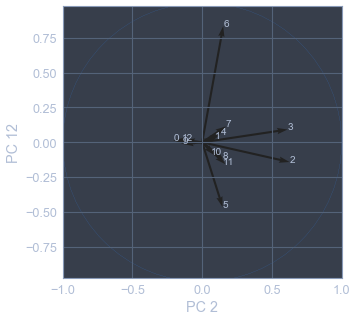

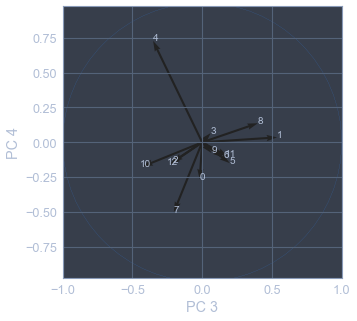

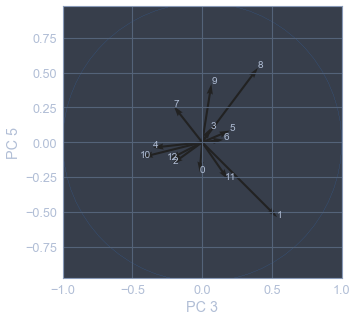

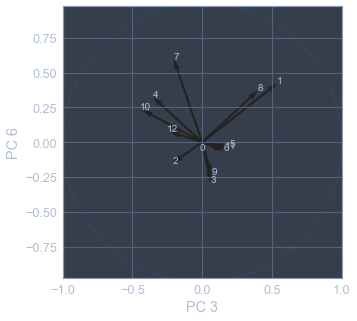

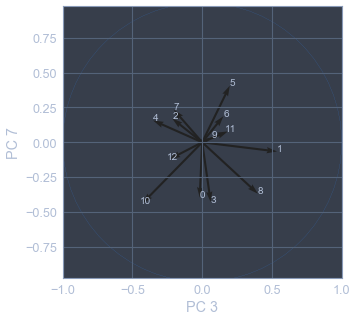

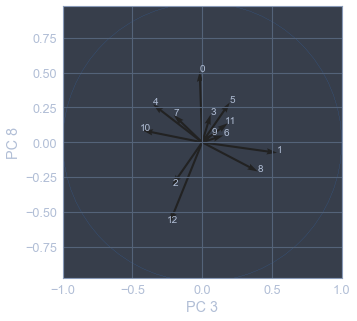

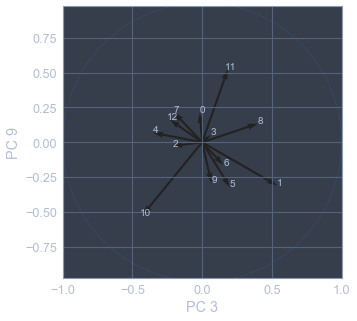

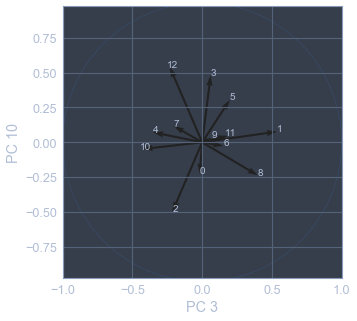

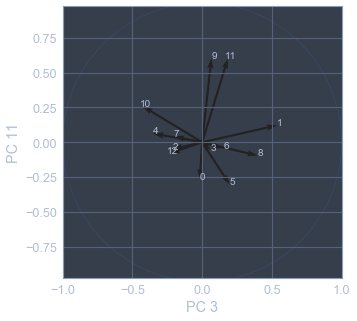

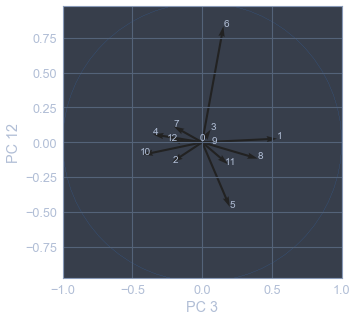

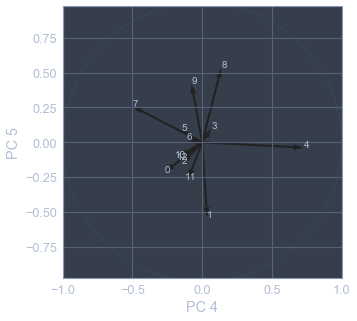

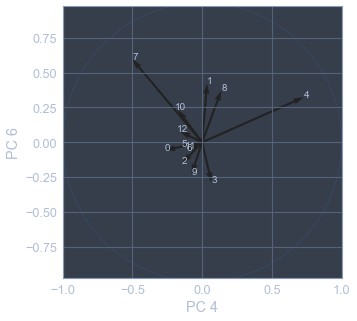

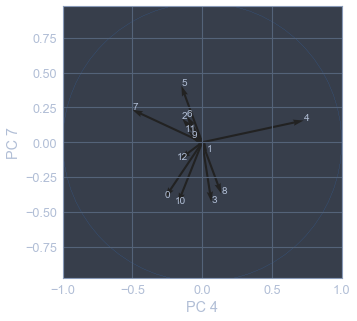

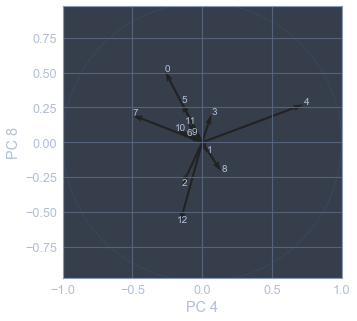

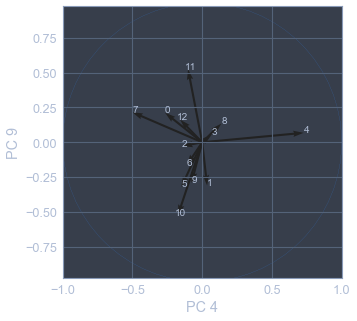

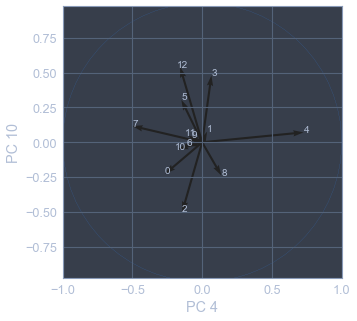

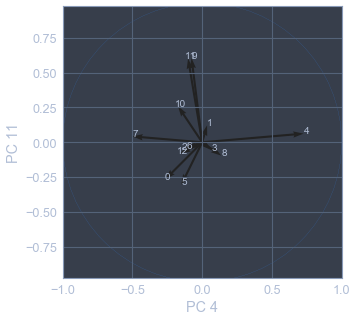

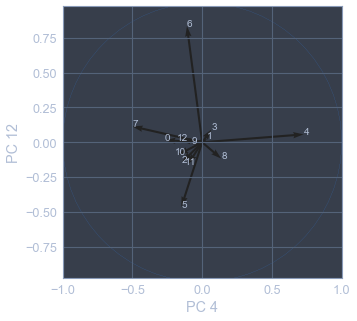

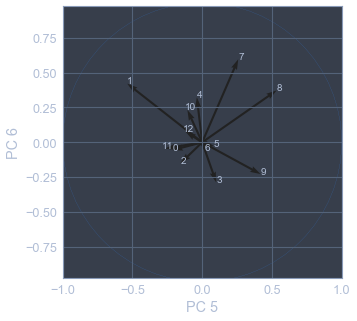

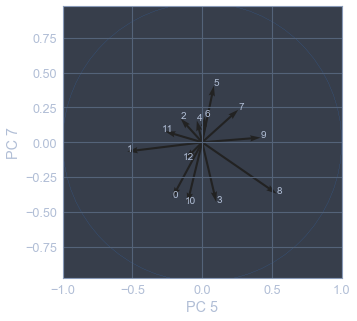

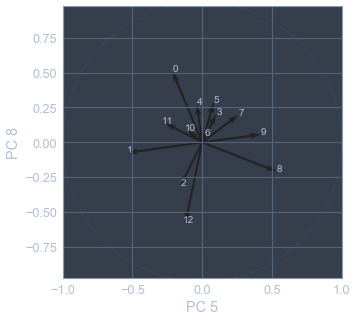

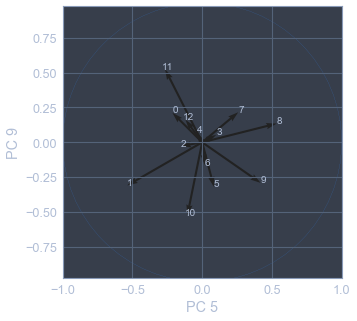

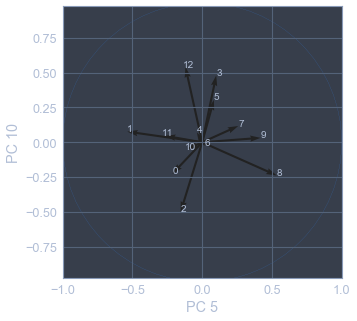

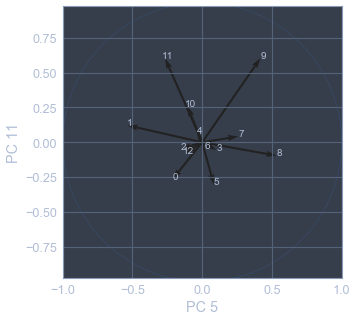

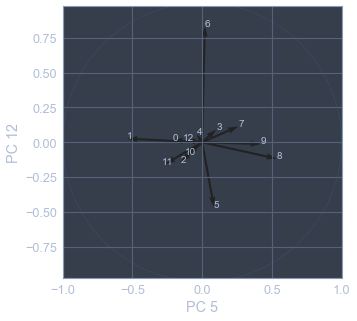

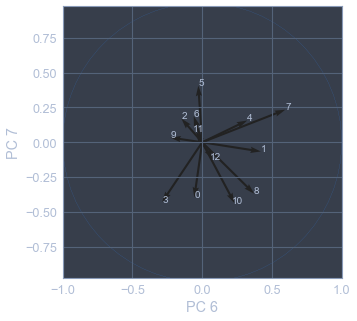

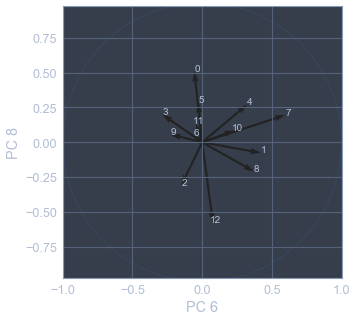

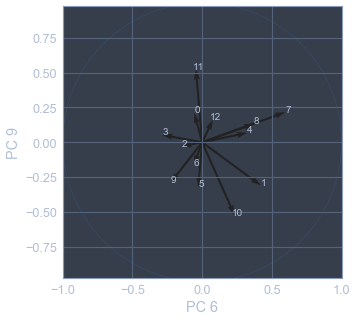

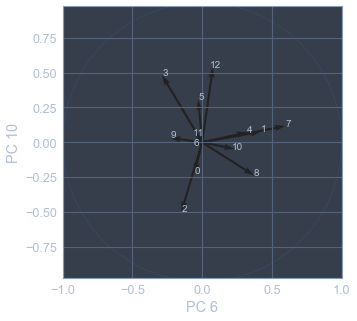

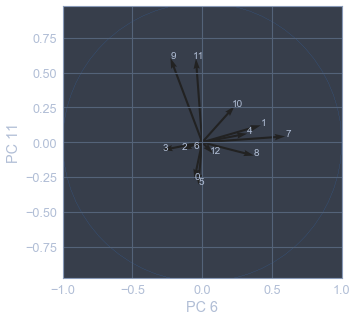

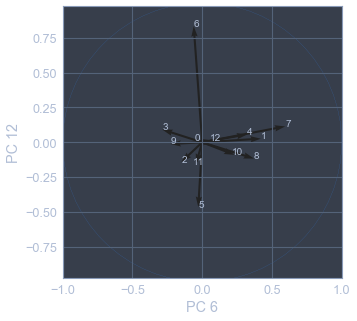

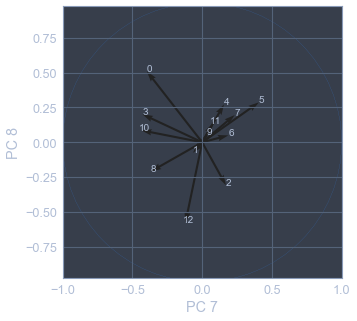

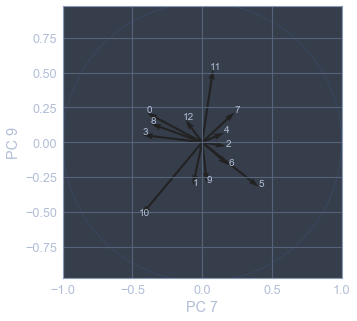

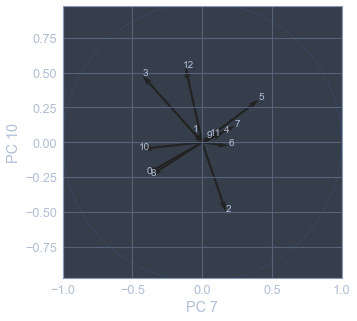

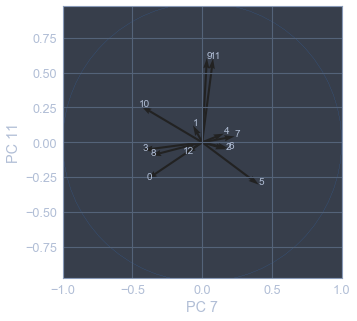

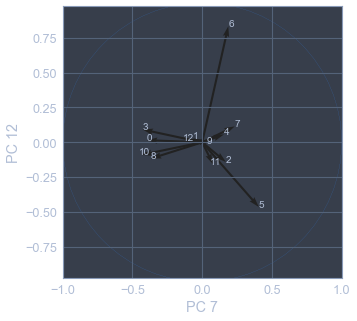

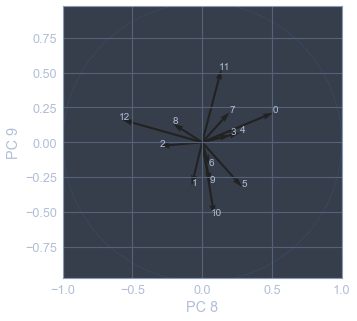

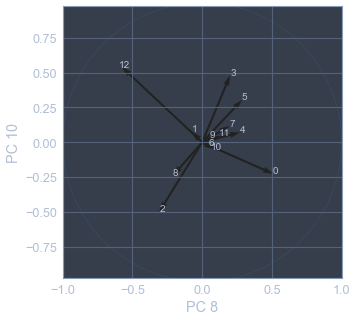

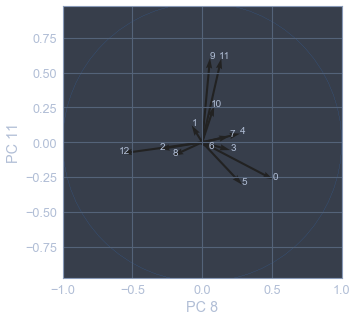

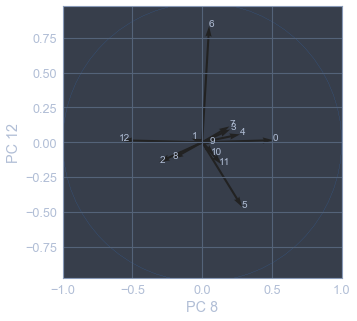

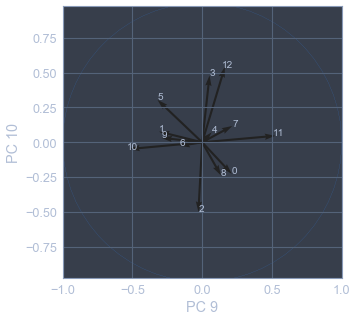

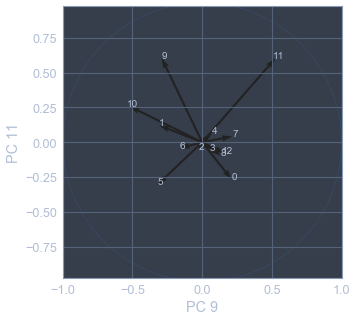

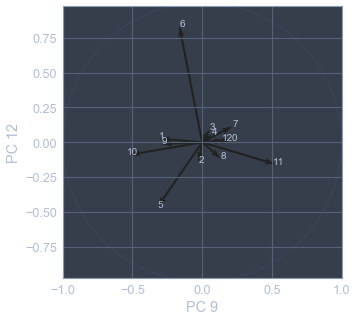

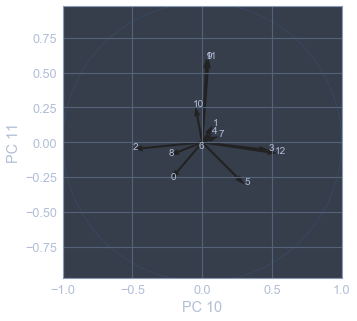

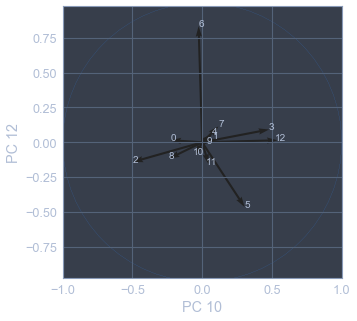

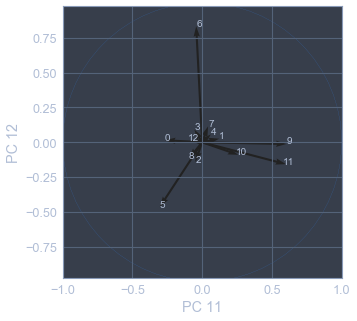

In [15]:
pca_circle_of_correlations(X)